출처: https://github.com/Avik-Jain/100-Days-Of-ML-Code/

> 내용은 계속 추가될 예정입니다.


# 1일차: 데이터 전처리하기

## 1. 필요한 라이브러리 불러오기
- numpy는 수학적 계산에 사용됩니다.
- pandas는 데이터셋을 불러오고 편집하는데 사용됩니다.

In [1]:
import numpy as np
import pandas as pd

## 2. 데이터셋 불러오기
많은 머신러닝 데이터셋들은 **csv** 포멧으로 되어있습니다. `pandas`에서 손쉽게 불러올수 있습니다.

In [18]:
df = pd.read_csv('./data/Day1.csv', sep=',')
X = df.iloc[ : , :-1].values
y = df.iloc[ : , 3].values
df.tail()

,Country,Age,Salary,Purchased
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### 누락된 값 확인하기

In [10]:
df[df.isnull().values]

,Country,Age,Salary,Purchased
4,Germany,40.0,NaN,Yes
6,Spain,NaN,52000.0,No


## 3. 누락된 데이터 처리

불러온 데이터에 **NaN**라는 누락된 데이터가 있습니다. 이런 누락된 값을 채우기 위해 열의 평균값을 넣어보도록 하겠습니다.

In [19]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = "NaN", strategy = "mean", axis = 0)
imputer = imputer.fit(X[ : , 1:3])
X[ : , 1:3] = imputer.transform(X[ : , 1:3])
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## 4. 범주형 데이터 변환하기
**Country**는 범주형 데이터 입니다. `LabelEncoder` 기능을 사용해 숫자로 변환을 하도록 하겠습니다.

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[ : , 0] = labelencoder_X.fit_transform(X[ : , 0])
X[ : , 0] # Country 열

array([0, 2, 1, 2, 1, 0, 2, 0, 1, 0], dtype=object)

### 임시 변수(dummy variable) 만들기

In [21]:
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
labelencoder_y = LabelEncoder()
y =  labelencoder_y.fit_transform(y)

In [22]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

## 5. 데이터 세트를 학습 세트와 테스트 세트로 나누기

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X , y , test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape)

(8, 5) (8,)


## 6. 특성 정규화(Feature Scaling)

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
X_train

array([[ 1.        , -0.57735027, -0.57735027, -0.7529426 , -0.62603778],
       [ 1.        , -0.57735027, -0.57735027,  1.00845381,  1.01304295],
       [ 1.        , -0.57735027, -0.57735027,  1.79129666,  1.83258331],
       [-1.        ,  1.73205081, -0.57735027, -1.73149616, -1.09434656],
       [ 1.        , -0.57735027, -0.57735027, -0.36152118,  0.42765698],
       [-1.        ,  1.73205081, -0.57735027,  0.22561096,  0.05040824],
       [-1.        , -0.57735027,  1.73205081, -0.16581046, -0.27480619],
       [-1.        , -0.57735027,  1.73205081, -0.01359102, -1.32850095]])

# 2일차: 단순 선형 회귀(Simple Linear Regression)
## 1. 데이터 전처리

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv('./data/Day2.csv')
X = dataset.iloc[ : ,   : 1 ].values
Y = dataset.iloc[ : , 1 ].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 42) 
dataset.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


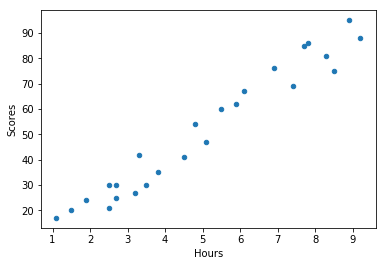

In [14]:
# 시각화 하기
# plt.scatter(dataset.Hours.values, dataset.Scores.values)
dataset.plot(x='Hours', y='Scores', kind = 'scatter')

## 2. 학습용 데이터에 선형 회귀 적용

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)
# 결과 예측하기
Y_pred = regressor.predict(X_test)
Y_pred

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

## 3. 시각화하기


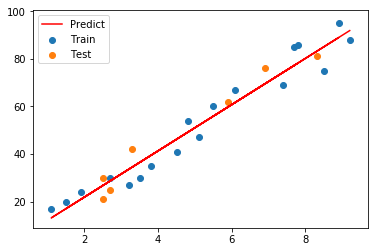

In [22]:
plt.plot(X_train , regressor.predict(X_train), color ='r')
plt.scatter(X_train , Y_train)
plt.scatter(X_test , Y_test)
plt.legend(['Predict','Train','Test'])

# 3일차: 다중 선형 회귀 분석(Multiple Linear Regression)
## 1. 데이터 전처리

In [23]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
dataset = pd.read_csv('./data/Day3.csv')
X = dataset.iloc[ : , :-1].values
Y = dataset.iloc[ : ,  4 ].values
dataset.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [29]:
## Encoding Categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[: , 3] = labelencoder.fit_transform(X[ : , 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()
## Avoiding Dummy Variable Trap
X = X[: , 1:]
## Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(X_train.shape, Y_train.shape)

(40, 53) (40,)


## 2. Fitting Multiple Linear Regression to the Training set

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
# Predicting the Test set results
Y_pred = regressor.predict(X_test)
Y_pred

array([129180.05366793,  84758.95839056,  97818.15534632,  46471.00661065,
       130602.99793716,  46036.3870647 , 109924.81453655, 103207.95439661,
        98256.13437754, 112012.25465562])

## 3. 평가하기

실제값과 예측된 값의 RMSE을 구해보도록 하겠습니다.

In [33]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_test, Y_pred))

8197.367417864012

# 4-5일차: 로지스틱 회귀(Logistic Regression)

>  D.R.Cox가 1958년에 제안한 확률 모델로서 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법이다. --위키피디아

## 1. 어떻게 작동하는가?

나중에 추가 예정


# 6일차: 로지스틱 회귀 사용하기

## 1. 데이터 전처리

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

dataset = pd.read_csv('./data/Day6.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [36]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train.shape

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


(300, 2)

## 2. 로지스틱 모델 만들기
The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

In [37]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 3. 예측하기

In [39]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

## 4. 모델 평가하기
예측한 값들이 실제값과 얼마나 비슷한지 비교를 통해 평가해 보겠습니다. 

### 혼동 행렬(Confusion Matrix) 만들기

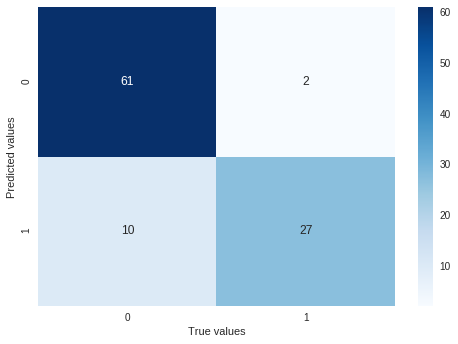

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# 시각화하기
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues').set(xlabel='True values', ylabel='Predicted values')

# 7일차: K 근접 이웃(K Nearest Neighbours)

## 1.  KNN은 무엇인가요?
KNN은 분류문제에 가장 간단하기에 가장 많이 사용되는  알고리즘입니다. 물론 회귀문제에도 사용할 수 있습니다. 
> KNN은 인스턴스 기반이기 때문에 게으른 알고리즘이라고 불립니다.

## 2. KNN은 어떻게 작동하나요?
분류문제에 KNN를 사용할때 고려해야할 3가지의 요소가 있습니다.
1. 데이터들간의 거리
2. k 값
3. 근처 데이터들의 갯수

## 3. 예측하기
모르는 데이터의 값을 예측하기 위해서는 위에서 살펴본 3가지 요소를 가지고 적절히 판단해야 합니다.

## 4. 거리 측정법
- Euclidean distance : 가장 흔하게 사용되는 방법입니다.
- Hamming distance
- Manhattan distance
- Minkonski distance

## 5. k 값?
k값은 작으면 잡음이 결과에 영향을 주고, 값이 크면 계산량이 늘어 시간이 오래걸립니다. 하지만 최적의 k값을 찾는것은 쉽지 않습니다. 문제마다 최적의 k값이 다름으로, 많은 시행착오가 필요합니다.

# 8일차: 로지스틱 회귀 분석의 수학

#100DaysOfMLCode To clear my insights on logistic regression I was searching on the internet for some resource or article and I came across [this article ](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc) by Saishruthi Swaminathan.

# 9 - 11일차: 
저자인 **Avik-Jain**가 SVM에 관해 자료를 준비하느라 업데이트 하지 않았습니다.

# 12일차: SVM(Support Vector Machines)

## SVM이란 무엇인가?
지도학습 알고리즘의 하나로 회귀와 분류 문제에 모두 사용 가능합니다.
> 거의 분류 문제에 사용하지만요 

데이터에 있는 특성의 갯수만큼의 차원을 만들고, 그안에 초평면을 만들어 데이터를 분류합니다.

## SVM의 목표
마진을 최대화 하는 초평면을 찾는 것입니다.

## SVM의 매개변수

1. Kenel
2. Gamma
3. Regularization
4. Margin

# 13- 일차 Support Vector Machine (SVM)
Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

데이터셋 불러오기

In [2]:
dataset = pd.read_csv('./data/Day6.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Fitting SVM to the Training set

In [8]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

Making the Confusion Matrix

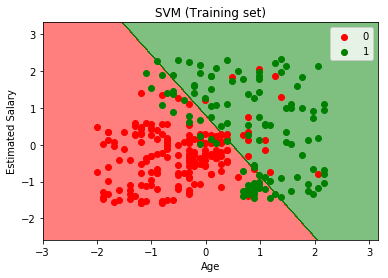

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results


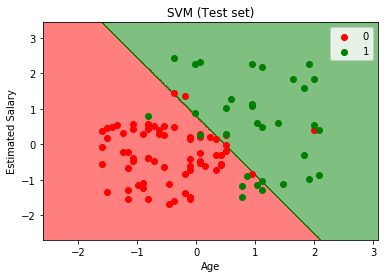

In [12]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()